https://youtu.be/7mi6cJSTj6Y?si=4FmMOlxItoU4hSu7

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
players_df = pd.read_csv("data/players.csv")

In [3]:
players_df

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


In [4]:
players_df["height_inches"] = players_df["height"].apply( lambda x: int(x.split("-")[0])*12 + int(x.split("-")[1]) if len(x.split("-"))==2 else int(x))

In [5]:
players_df

,nflId,height,weight,birthDate,collegeName,Position,displayName,height_inches
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,73
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,72
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,72
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich,73
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,73
...,...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton,75
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes,75
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron,69
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill,73


In [6]:
players_df["height_inches"].mean()

74.0106149341142

In [7]:
players_df.sample(10)["height_inches"].mean()

75.0

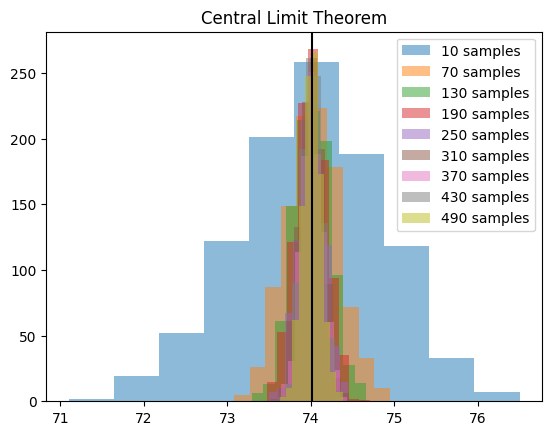

In [11]:
sample_amounts = range(10, 500, 60)

for x in sample_amounts:
    samples = []
    for i in range(1000):
        samples.append(players_df.sample(x)["height_inches"].mean())
    plt.hist(samples, alpha=0.5)
plt.legend([f"{z} samples" for z in sample_amounts])
plt.title("Central Limit Theorem")
plt.axvline(x=players_df["height_inches"].mean(), c="k")

In [12]:
players_df["height_inches"].sem()

0.05065243293253027

https://youtu.be/TqOeMYtOc1w?si=Wythg-FyVLp_stK9

## The Bootstrap

- The bootstrap is a sampling procedure to draw additional samples from a given sample.
- The procedure does not necessarily involve any assumptions about the data or the sample statistic being normally distributed.
- Suppose you have a sample from a population. You don't have the population. You can calculate a sample statistic, eg sample mean. You want to figure out just from this sample what statistic values would be reasonable for the whole population. We caan bootstrap the given sample. Bootstrap procedure:
    - From this sample of size $n$, randomly select $n$ values, with replacement.
    - Calculate the sample statistic.
    - Repeat the last two steps many (>10k) times.


## Confidence Intervals

- Suppose you have a lot of sample statistic values from a set of bootstrapped samples. Suppose the sample statistic here is the mean.
- A 95% confidence interval is just an interval that covers 95% of the means calculated by bootstrapping the sample.
- Why are confidence intervals useful?
    - Because confidence intervals are statistical tests performed visually.
    - The confidence interval covers 95% of the means, so we know that anything outside of it occurs less than 5% of the time.
    - I.e. the p-value of anything outside the confidence interval is <0.05, and thus is significantly different from the true statistic.

- Suppose we want to compare two samples (e.g. weight of female mice and wight of male mice).
- Do bootstrapping on both samples, and find the means of the bootstrapped samples.
- If 95% confidence intervals of the two bootstrapped means don't overlap, that means the 